In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('max_colwidth', 100)

In [3]:
df = pd.read_csv('Table_622.csv')

In [4]:
df.head()

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,Exp,url,Industry
0,AGCO Corporation,Founded in 1990,More than 1000 employees,Bangalore,238770,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",Siddhartha S,Product Owner,Technical Management → Product Manageme,5-9 Years,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,Agriculture / Dairy
1,Digicides,Founded in 2017,10 - 50 employees,"Hyderabad, Pune",232279,"Business Development, Corporate Sales, Sales",Pratiksha Yaduwanshi,Sales Associate,Sales and Business → Sales / Business Developme,1-4 Years,https://www.instahyre.com/job-232279-sales-associate-at-digicides-hyderabad-pune/,Agriculture / Dairy
2,Kern Seedtech,Founded in 2021,10 - 50 employees,Work From Home,258174,"Brand Management, Business Development, Corporate Strategy, General Management, Operations Manag...",Ankit Garg,CRM & Digital Marketing Specialist,Sales and Business → General Management / Strategy,3-6 Years,https://www.instahyre.com/job-258174-crm-digital-marketing-specialist-at-kern-seedtech-work-from...,Agriculture / Dairy
3,Blue Ocean Academy,Founded in 1988,10 - 50 employees,Delhi,220759,"Direct Sales, Telecalling",Deepak Mahajan,Training Consultant,Sales and Business → Sales / Business Developme,2-4 Years,https://www.instahyre.com/job-220759-training-consultant-at-blue-ocean-academy-delhi/,Airlines / Aviation / Aerospace
4,SugarBox Networks,Founded in 2016,200 - 500 employees,Mumbai,241862,"Business Development, Sales",Aparna Chaphekar,Business Development Manager,Sales and Business → Sales / Business Developme,2-6 Years,https://www.instahyre.com/job-241862-business-development-manager-at-sugarbox-networks-mumbai/,Airlines / Aviation / Aerospace


In [5]:
df['Exp'] = df['Exp'].str.replace(' Years','')

In [6]:
df['Exp'][0]

'5-9'

In [7]:
a = df['Exp'][1].split('-')

In [8]:
(int(a[0])+int(a[1]))/2

2.5

In [9]:
#Taking mean of range of experience values

df['Exp']=(df.Exp.str.split('-').str[0].astype('int64')+df.Exp.str.split('-').str[1].astype('int64'))/2

In [10]:
df['Exp']

0      7.0
1      2.5
2      4.5
3      3.0
4      4.0
      ... 
617    7.0
618    5.0
619    1.5
620    2.0
621    2.0
Name: Exp, Length: 622, dtype: float64

In [11]:
# creating bins (intervals) of mean experience values
df['Exp_range']=pd.cut(df['Exp'], bins=[-1,0,3,5,8,12,21])

In [12]:
df[['Exp','Exp_range']]

,Exp,Exp_range
0,7.0,"(5, 8]"
1,2.5,"(0, 3]"
2,4.5,"(3, 5]"
3,3.0,"(0, 3]"
4,4.0,"(3, 5]"
...,...,...
617,7.0,"(5, 8]"
618,5.0,"(3, 5]"
619,1.5,"(0, 3]"
620,2.0,"(0, 3]"


In [13]:
df['Exp_range'].value_counts()

(0, 3]      280
(3, 5]      193
(5, 8]       89
(8, 12]      49
(12, 21]      7
(-1, 0]       4
Name: Exp_range, dtype: int64

In [14]:
# encoding the above interval values of experience
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['Exp_range'] = le.fit_transform(df['Exp_range'])

In [16]:
df['Exp_range'].value_counts()

1    280
2    193
3     89
4     49
5      7
0      4
Name: Exp_range, dtype: int64

In [17]:
# entry-level, intermediate, mid-level, and senior or executive level.
# 0 - Fresher - (-1, 0]       4
# 1 - Junior Level - (0, 3]      281
# 2 - Intermediate Level - (3, 5]      193
# 3 - Mid - Senior Level - (5, 8]     121
# 4 - Senior - (8, 12]     17
# 5 - Executive - (12, 21]      7

In [18]:
# applying class categorization of experience levels 
def Experince_level(val):
    if val==0:
        return 'Fresher'
    elif val==1:
        return 'Junior Level'
    elif val==2:
        return 'Intermediate Level'
    elif val==3:
        return 'Mid Senior Level'
    elif val==4:
        return 'Senior'
    elif val==5:
        return 'Executive'

In [19]:
df['Experince_level'] = df['Exp_range'].apply(Experince_level)

In [20]:
df.head()

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,Exp,url,Industry,Exp_range,Experince_level
0,AGCO Corporation,Founded in 1990,More than 1000 employees,Bangalore,238770,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",Siddhartha S,Product Owner,Technical Management → Product Manageme,7.0,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,Agriculture / Dairy,3,Mid Senior Level
1,Digicides,Founded in 2017,10 - 50 employees,"Hyderabad, Pune",232279,"Business Development, Corporate Sales, Sales",Pratiksha Yaduwanshi,Sales Associate,Sales and Business → Sales / Business Developme,2.5,https://www.instahyre.com/job-232279-sales-associate-at-digicides-hyderabad-pune/,Agriculture / Dairy,1,Junior Level
2,Kern Seedtech,Founded in 2021,10 - 50 employees,Work From Home,258174,"Brand Management, Business Development, Corporate Strategy, General Management, Operations Manag...",Ankit Garg,CRM & Digital Marketing Specialist,Sales and Business → General Management / Strategy,4.5,https://www.instahyre.com/job-258174-crm-digital-marketing-specialist-at-kern-seedtech-work-from...,Agriculture / Dairy,2,Intermediate Level
3,Blue Ocean Academy,Founded in 1988,10 - 50 employees,Delhi,220759,"Direct Sales, Telecalling",Deepak Mahajan,Training Consultant,Sales and Business → Sales / Business Developme,3.0,https://www.instahyre.com/job-220759-training-consultant-at-blue-ocean-academy-delhi/,Airlines / Aviation / Aerospace,1,Junior Level
4,SugarBox Networks,Founded in 2016,200 - 500 employees,Mumbai,241862,"Business Development, Sales",Aparna Chaphekar,Business Development Manager,Sales and Business → Sales / Business Developme,4.0,https://www.instahyre.com/job-241862-business-development-manager-at-sugarbox-networks-mumbai/,Airlines / Aviation / Aerospace,2,Intermediate Level


In [21]:
#no need of these two columns Exp_range and Exp
df.drop(['Exp_range','Exp'],axis=1,inplace=True)

In [22]:
df.head(1)

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,url,Industry,Experince_level
0,AGCO Corporation,Founded in 1990,More than 1000 employees,Bangalore,238770,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",Siddhartha S,Product Owner,Technical Management → Product Manageme,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,Agriculture / Dairy,Mid Senior Level


In [23]:
df['employees_count'].value_counts()

10 - 50 employees           203
50 - 200 employees          189
More than 1000 employees     81
200 - 500 employees          80
0 - 10 employees             39
500 - 1000 employees         30
Name: employees_count, dtype: int64

In [24]:
# taking mean values of employee range 
temp = {
    "More than 1000 employees": 1000,
    "500 - 1000 employees": 750,
    "50 - 200 employees": 125,
    "200 - 500 employees": 350,
    "10 - 50 employees": 30,
    "0 - 10 employees": 5
}
df['employees_count'] = df['employees_count'].replace(temp).astype('int64')

In [25]:
df.head(1)

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,url,Industry,Experince_level
0,AGCO Corporation,Founded in 1990,1000,Bangalore,238770,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",Siddhartha S,Product Owner,Technical Management → Product Manageme,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,Agriculture / Dairy,Mid Senior Level


In [26]:
# cleaning estab_year column and converting dtype to int
df['estab_year'] = df['estab_year'].replace('[^0-9]','',regex=True).astype('int64')

In [27]:
df.head(1)

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,url,Industry,Experince_level
0,AGCO Corporation,1990,1000,Bangalore,238770,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",Siddhartha S,Product Owner,Technical Management → Product Manageme,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,Agriculture / Dairy,Mid Senior Level


In [28]:
# calculating age of the company
df['AgeOfCompany'] = 2023 - df['estab_year']

In [29]:
df.sample(3)

,name,estab_year,employees_count,location,job_ids,skills,hr,Designation,Involvement,url,Industry,Experince_level,AgeOfCompany
297,Qualimatrix Technologies,2021,30,Indore,205510,"Business Development, Sales",Vikram Mishra,Bussiness Development Executive,Sales and Business → Sales / Business Developme,https://www.instahyre.com/job-205510-bussiness-development-executive-at-qualimatrix-technologies...,Computer Software / IT / Internet,Junior Level,2
178,Sungevity Enterprise,2023,30,Pune,261719,"BPO Operations, Call Center Operations, Customer Interaction, Customer Service",Amritpal Singh,Call Centre Operations Manager,Sales and Business → Customer Service,https://www.instahyre.com/job-261719-call-centre-operations-manager-at-sungevity-enterprise-pune/,Computer Software / IT / Internet,Junior Level,0
380,Blue Ocean Academy,1988,30,Delhi,220759,"Direct Sales, Telecalling",Deepak Mahajan,Training Consultant,Sales and Business → Sales / Business Developme,https://www.instahyre.com/job-220759-training-consultant-at-blue-ocean-academy-delhi/,Education / Training,Junior Level,35


In [30]:
rename = {
  'name' : 'CompanyName',
 'estab_year' : 'Company_estab_year',
 'employees_count' : 'employees_count',
 'location': 'Location',
 'job_ids' :'JobID',
 'skills' :'Skills',
 'hr' : 'Hr_name',
 'Designation' : 'Job_Designation',
 'Involvement' : 'Involvement',
 'url' : 'Job_url',
 'Industry' : 'Industry',
 'Experince_level' : 'Experince_level',
 'AgeOfCompany' : 'AgeOfCompany'
}
df.rename(columns = rename,inplace=True)

In [31]:
df.columns.to_list()
# len(df.columns.to_list())  --> 13

['CompanyName',
 'Company_estab_year',
 'employees_count',
 'Location',
 'JobID',
 'Skills',
 'Hr_name',
 'Job_Designation',
 'Involvement',
 'Job_url',
 'Industry',
 'Experince_level',
 'AgeOfCompany']

In [32]:
reordering = ['JobID', 'Job_Designation', 'Involvement', 'Experince_level', 'Hr_name', 'Skills', 'CompanyName', 'Company_estab_year', 'AgeOfCompany',
              'Industry', 'Location', 'employees_count', 'Job_url' ]

In [33]:
len(reordering)

13

In [34]:
# reordering dataframe 
df = df[reordering]

In [35]:
df.head(1)

,JobID,Job_Designation,Involvement,Experince_level,Hr_name,Skills,CompanyName,Company_estab_year,AgeOfCompany,Industry,Location,employees_count,Job_url
0,238770,Product Owner,Technical Management → Product Manageme,Mid Senior Level,Siddhartha S,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",AGCO Corporation,1990,33,Agriculture / Dairy,Bangalore,1000,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/


In [36]:
df.shape

(622, 13)

In [37]:
df['employees_count'].value_counts()

30      203
125     189
1000     81
350      80
5        39
750      30
Name: employees_count, dtype: int64

Text(0, 0.5, 'Age of Company')

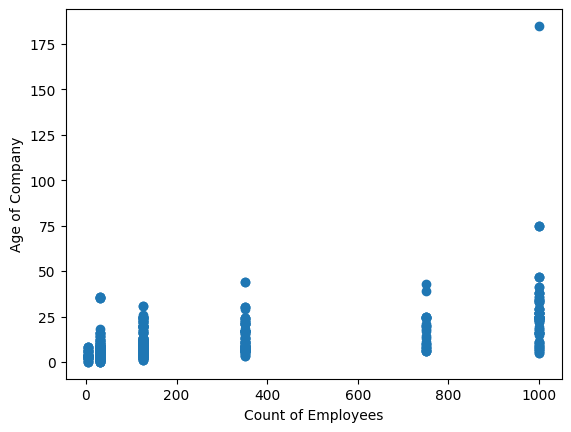

In [38]:
plt.scatter(df.employees_count,df.AgeOfCompany)
plt.xlabel('Count of Employees')
plt.ylabel('Age of Company')

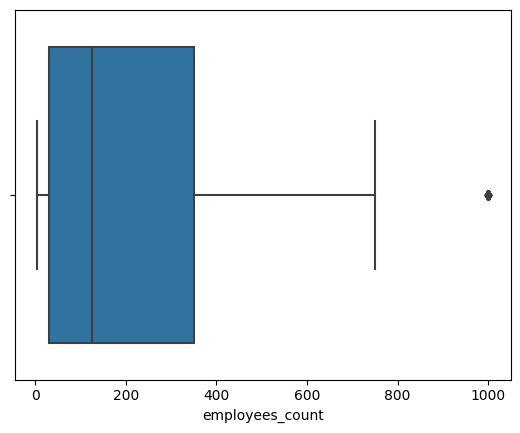

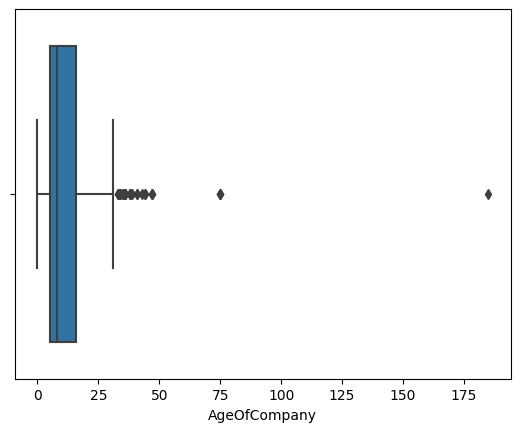

In [39]:
# df.employees_count,df.AgeOfCompany
for i in ['employees_count', 'AgeOfCompany']:
    sns.boxplot(x=df[i])
    plt.show()

In [40]:
# removing the extreme outliers
df = df[df['AgeOfCompany']<=50]

Text(0, 0.5, 'Age of Company')

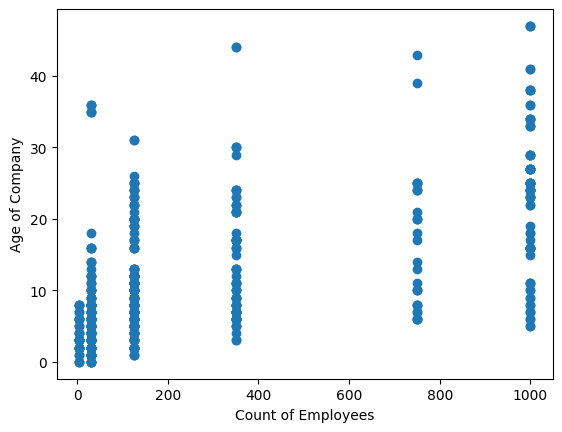

In [41]:
plt.scatter(df.employees_count,df.AgeOfCompany)
plt.xlabel('Count of Employees')
plt.ylabel('Age of Company')

In [42]:
df.head(1)

,JobID,Job_Designation,Involvement,Experince_level,Hr_name,Skills,CompanyName,Company_estab_year,AgeOfCompany,Industry,Location,employees_count,Job_url
0,238770,Product Owner,Technical Management → Product Manageme,Mid Senior Level,Siddhartha S,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",AGCO Corporation,1990,33,Agriculture / Dairy,Bangalore,1000,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/


In [43]:
# df.to_csv('Merged_Data.csv',index=False) #Saving the ordered dataframe

In [44]:
df.head(1)

,JobID,Job_Designation,Involvement,Experince_level,Hr_name,Skills,CompanyName,Company_estab_year,AgeOfCompany,Industry,Location,employees_count,Job_url
0,238770,Product Owner,Technical Management → Product Manageme,Mid Senior Level,Siddhartha S,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",AGCO Corporation,1990,33,Agriculture / Dairy,Bangalore,1000,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/


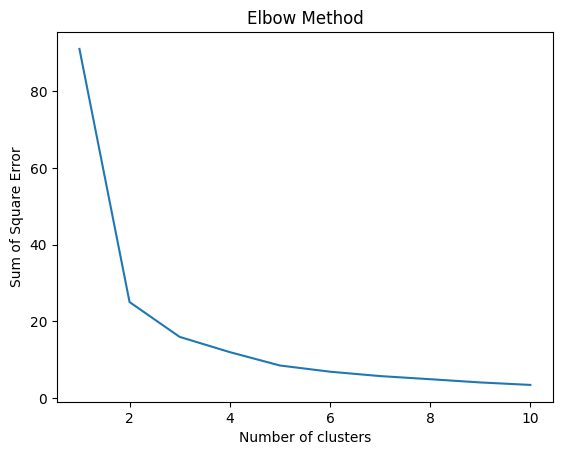

In [45]:
# using k-mean clustering algorithm to make class of companies based on age of company, employee_count

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
sc = MinMaxScaler()

df[['employees_count_sc', 'AgeOfCompany_sc']] = sc.fit_transform(df[['employees_count', 'AgeOfCompany']])

sse = []

# Elbow method plt

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=11000,n_init=10, random_state=42)
    kmeans.fit(df[['employees_count_sc', 'AgeOfCompany_sc']])
    sse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Square Error')
plt.show()

In [46]:
# taking 5 clusters for the model on the basis of elbow mtd
km = KMeans(n_clusters=5, init='k-means++', max_iter=11000, n_init=10, random_state=42)
y_predicted = km.fit_predict(df[['employees_count_sc', 'AgeOfCompany_sc']])
y_predicted
df['Class']=y_predicted

In [47]:
# cluster's centers
km.cluster_centers_

array([[0.05993699, 0.13184875],
       [0.96167277, 0.62856113],
       [0.34673367, 0.21382979],
       [0.1798995 , 0.51129296],
       [0.89007538, 0.24778369]])

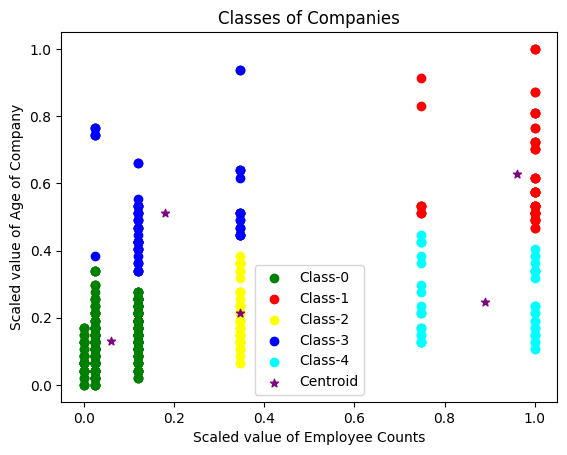

In [48]:
# plotting clusters with their centroids

df1 = df[df.Class==0]
df2 = df[df.Class==1]
df3 = df[df.Class==2]
df4 = df[df.Class==3]
df5 = df[df.Class==4]
# df[['employees_count', 'AgeOfCompany']]
plt.scatter(df1.employees_count_sc, df1.AgeOfCompany_sc,color='green',label='Class-0')
plt.scatter(df2.employees_count_sc, df2.AgeOfCompany_sc,color='red',label='Class-1')
plt.scatter(df3.employees_count_sc, df3.AgeOfCompany_sc,color='yellow',label='Class-2')
plt.scatter(df4.employees_count_sc, df4.AgeOfCompany_sc,color='blue',label='Class-3')
plt.scatter(df5.employees_count_sc, df5.AgeOfCompany_sc, color='cyan',label='Class-4')
plt.xlabel("Scaled value of Employee Counts")
plt.ylabel('Scaled value of Age of Company')
plt.title('Classes of Companies')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.legend()

In [49]:
df.head(1)

,JobID,Job_Designation,Involvement,Experince_level,Hr_name,Skills,CompanyName,Company_estab_year,AgeOfCompany,Industry,Location,employees_count,Job_url,employees_count_sc,AgeOfCompany_sc,Class
0,238770,Product Owner,Technical Management → Product Manageme,Mid Senior Level,Siddhartha S,"Product Management, Agile, Data Analysis, Stakeholder Management, Warranty Management",AGCO Corporation,1990,33,Agriculture / Dairy,Bangalore,1000,https://www.instahyre.com/job-238770-product-owner-at-agco-corporation-bangalore/,1.0,0.702128,1


In [50]:
#Saving the ordered dataframe
df.to_csv('Merged_Data.csv',index=False) 